In [1]:
import numpy as np
import sklearn
import pandas as pd

In [3]:
# Note: I've put the csv files in a folder called data
train = pd.read_csv("../data/train.csv", index_col=0)

In [4]:
train.shape

(15539, 2)

In [5]:
train.head()

,labels,features
ex_id,,
0,"446,521,1149,1249,1265,1482",0:0.084556 1:0.138594 2:0.094304 3:0.195764 4:...
1,"78,80,85,86",0:0.050734 1:0.762265 2:0.754431 3:0.065255 4:...
2,"457,577,579,640,939,1158",0:0.101468 1:0.138594 2:0.377215 3:0.130509 4:...
3,"172,654,693,1704",0:0.186024 1:0.346484 2:0.141456 3:0.195764 4:...
4,"403,508,1017,1052,1731,3183",0:0.135290 1:0.277187 2:0.141456 3:0.065255 4:...


# Remove broken label examples

In [12]:
labels_list = [label.split(" ") for label in train['labels']]
labels_list = [label[0].split(",") for label in labels_list]

In [13]:
# drop the broken indices - found them using this - need to ask on Piazza what's wrong with them
broken_indices = []
for i in range(len(labels_list)):
    for j in range(len(labels_list[i])):
        try:
            int(labels_list[i][j])   
        except:
            #print(i, labels_list[i])
            broken_indices.append(i)

In [14]:
len(broken_indices)

28

In [15]:
labels_array = np.array(labels_list)
labels_list = np.delete(labels_array, broken_indices).tolist()

In [16]:
len(labels_list)

15511

# Convert labels

In [17]:
labels_list = [[int(s) for s in sublist] for sublist in labels_list] 

In [18]:
labels_list[0:10]

[[446, 521, 1149, 1249, 1265, 1482],
 [78, 80, 85, 86],
 [457, 577, 579, 640, 939, 1158],
 [172, 654, 693, 1704],
 [403, 508, 1017, 1052, 1731, 3183],
 [174, 379, 380, 381, 449, 493, 677, 1328],
 [592, 595, 617, 694, 923],
 [446, 499, 500, 671, 804, 1210],
 [64, 180, 611],
 [505, 1098, 1310, 1818, 3263]]

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes = range(3993))
encoded_labels = mlb.fit_transform(labels_list)

In [26]:
mlb.classes_

array([   0,    1,    2, ..., 3990, 3991, 3992])

In [27]:
len(mlb.classes_)

3993

In [28]:
encoded_labels_df = pd.DataFrame(encoded_labels, columns=mlb.classes_)

In [29]:
encoded_labels_df

,0,1,2,3,4,5,6,7,8,9,...,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Convert features

In [30]:
def make_dict(entry):
    # entry is a list with form ['id:value', 'id:value']
    col_dict = {}
    for word in entry:
        key, value = word.split(":")
        key = int(key)
        value = float(value)
        col_dict[key] = value
    return col_dict

In [31]:
# drop broken indices
train_df = train['features']
train_df = train_df.drop(broken_indices, axis=0)

In [32]:
train_df.shape

(15511,)

In [33]:
features = [item.split(" ") for item in train_df]
col_dicts = [make_dict(entry) for entry in features]

In [34]:
len(col_dicts)

15511

In [35]:
# Turn features column into sparse dataframe
# Note: missing values as NaN - should these be zeros?

features_df = pd.DataFrame(col_dicts)

In [36]:
features_df.shape

(15511, 5000)

In [37]:
features_df.head()

,0,1,2,3,4,5,6,7,8,10,...,4879,4815,4890,4457,3907,4642,4137,3779,4833,4710
0,0.084556,0.138594,0.094304,0.195764,0.612552,0.106491,0.137765,0.145839,0.304610,0.465152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.050734,0.762265,0.754431,0.065255,0.350030,NaN,0.137765,NaN,NaN,0.620203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.101468,0.138594,0.377215,0.130509,0.175015,0.745434,0.137765,1.020873,1.218441,1.085356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.186024,0.346484,0.141456,0.195764,0.262522,0.425962,0.551062,0.437517,0.609220,0.620203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.135290,0.277187,0.141456,0.065255,1.137597,0.106491,0.137765,0.583356,0.152305,0.155051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploring

In [38]:
import matplotlib.pyplot as plt

In [39]:
flattened_labels = [val for sublist in labels_list for val in sublist]

### Counts of every label in full train set

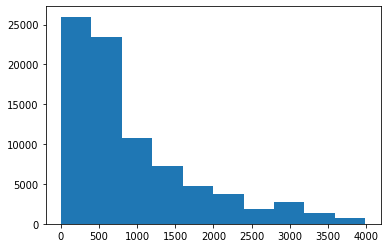

In [40]:
plt.hist(flattened_labels)
plt.show()

### Distribution of number of labels per sample 

In [41]:
label_count = [len(label) for label in labels_list]

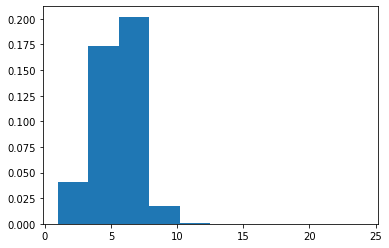

In [42]:
plt.hist(label_count, density=True)
plt.show()

In [43]:
# print 5-number summary of label counts
quartiles = np.percentile(label_count, [25, 50, 75])
print('Min: %.3f' % min(label_count))
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Mean: %.3f' % (sum(label_count)/len(label_count)))
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % max(label_count))

Min: 1.000
Q1: 5.000
Median: 6.000
Mean: 5.321
Q3: 6.000
Max: 24.000


In [ ]:
### Check which labels never occur?